In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy as sp
import sympy as sym
import scipy.optimize as spo
from mpl_toolkits.mplot3d import axes3d
from mpl_toolkits.mplot3d.axes3d import *
from matplotlib import cm

In [ ]:
datos=pd.read_csv('575C.dat',sep="\t\t")
data=datos.to_numpy()
t,Reser,Cama= data[:,0],data[:,1],data[:,2]

Cama[314]=Cama[315]


Reser[317]=Reser[314]
Reser[318]=Reser[314]
Reser[319]=Reser[322]
Reser[320]=Reser[322]
Reser[315]=Reser[314]
Reser[316]=Reser[314]

#t=t[0:-850]
#Reser=Reser[850:]
#Cama=Cama[850:]

(array([314]),)
58.38
23.5
(array([], dtype=int64),)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


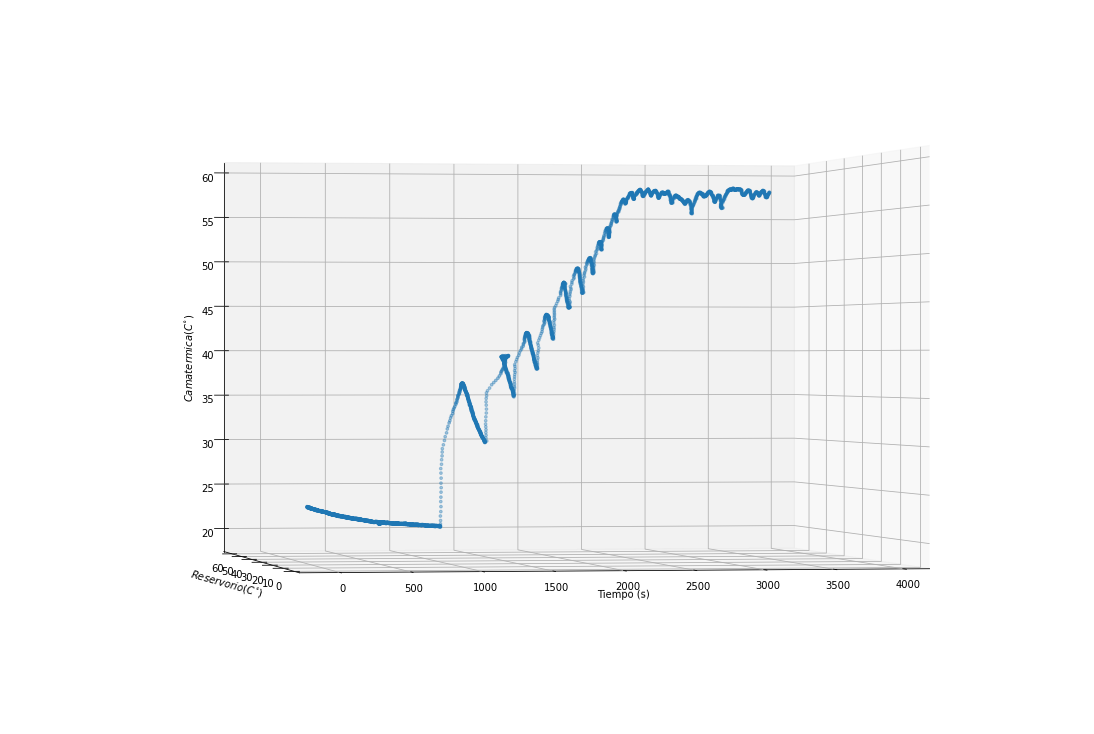

In [ ]:
%matplotlib inline
fig = plt.figure(figsize=(15,10))
ax = Axes3D(fig, elev= 0, azim =-100)
ax.scatter(t,Reser,Cama, marker='.',s=30)
ax.set_xlabel("Tiempo (s)")
ax.set_ylabel(r"$Reservorio (C ^{\circ})$")
ax.set_zlabel(r"$Cama termica (C ^{\circ})$")
#ax.scatter(xR,yR,zR, marker='.')
plt.show()

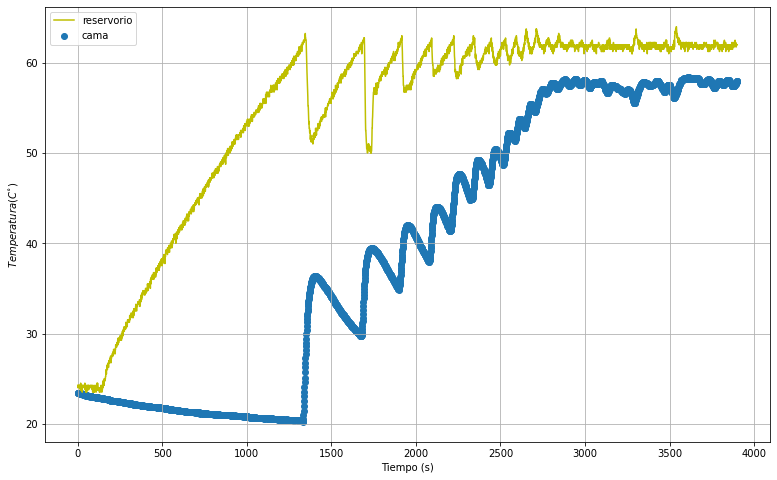

In [ ]:
fig = plt.figure(figsize=(13,8))
#ax = Axes3D(fig, elev= 40, azim =-100)
#Axes3D.plot(t, Reser,Cama)
plt.scatter(t,Cama,label='cama')
plt.plot(t,Reser,c='y',label='reservorio')
plt.legend()
plt.xlabel("Tiempo (s)")
plt.ylabel(r"$Temperatura (C ^{\circ})$")
#plt.xlim(0,800)
plt.grid()
plt.show()
fig.savefig('43CcharaRC.jpg')

In [ ]:
spo.curve_fit(lambda t,a,b,c: a/(b+np.exp(-t*c)),  t,  Cama)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in exp
  """Entry point for launching an IPython kernel.


(array([3.95460874e+01, 8.91629166e-01, 3.93495100e-03]),
 array([[ 9.80026048e-02,  2.10777469e-03, -8.41338480e-06],
        [ 2.10777469e-03,  4.65888297e-05, -1.57752587e-07],
        [-8.41338480e-06, -1.57752587e-07,  1.39499918e-09]]))

In [ ]:
y=lambda t:3.95460874e+01/( 8.91629166e-01 +np.exp(-t*3.93495100e-03))

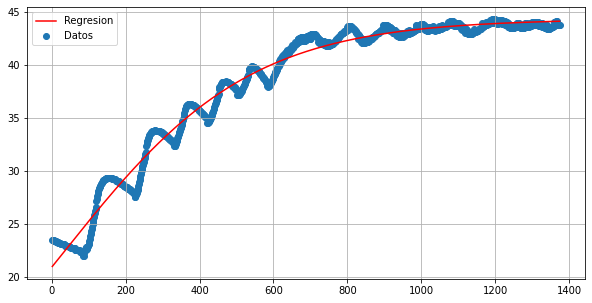

In [ ]:
fig = plt.figure(figsize=(10,5))
plt.scatter(t,Cama, label="Datos")
plt.plot(t,y(t),c='r',label="Regresion")
plt.legend()
plt.grid()
plt.show()
fig.savefig('43CcharaReg.jpg')

# $y(t)= \frac{4.0856e+01}{8.681e-01+ e^{2.775e-03}}$










In [ ]:

t1 = sym.Symbol('t1', real=True)

ye =  3.95460874e+01/(8.91629166e-01   + sym.exp(-t1*3.93495100e-03))
ye_prime = sym.diff(ye,t1)
print(ye_prime)
ye_n= lambda t: (0.155611916160717* np.exp(-0.003934951*t))/((0.891629166+ np.exp(-0.003934951*t))**2)

0.155611916160717*exp(-0.003934951*t1)/(0.891629166 + exp(-0.003934951*t1))**2


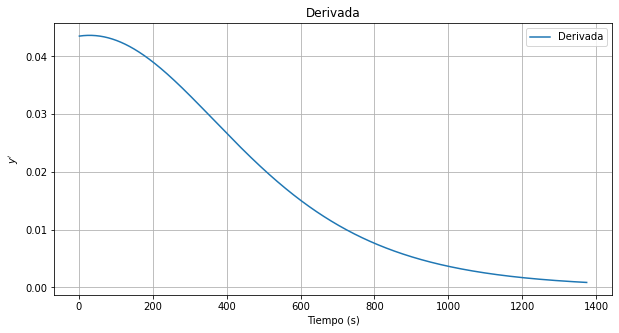

In [ ]:
fig = plt.figure(figsize=(10,5))
plt.plot(t,ye_n(t), label='Derivada')
plt.title("Derivada")
plt.xlabel("Tiempo (s)")
plt.ylabel(r"$y'$")
plt.legend()
plt.grid()
plt.show()
fig.savefig('43CcharaDef.jpg')

# $y'(t)= \frac{0.114*e^{-0.00278t}}{(0.868+ e^{-0.00278*t})^{2}}$




